# Project Proposal

### Introduction
Heart disease is one of the leading causes of death worldwide, and its incidence continues to rise (Roth., et al, 2020). It is a series of conditions that includes irregular heartbeats, vascular disease (e.g. coronary artery disease), etc (Tsao., et al, 2022).  In addition, the effects of heart disease may differ for males and females (Di Fusco., et al, 2014). In this study, we will focus on whether gender affects heart rate. More specifically, we will explore whether there is a difference in heart rate between males and females with heart disease.

Our dataset originates from a database studying heart disease with 76 attributes, filtered down to 14. The data was compiled in 1988 from four different locations: Cleveland, Hungary, Switzerland, and VA Long Beach. We will only be looking at two variables: sex and maximum heart rate.

### Preliminary Results
Our first job is to import our dataset, tidy it up, and select our variables. As our dataset is actually split into four different regional subsets, we decided to merge them into one. The only variables needed would be sex and maximum heart rate, but we kepy region for potential future blocking. We also decided to rename the sex categories from 0 and 1 to female and male for better readibility.

In [33]:
library(infer)
library(tidyverse)

In [34]:
# here we import each regional subset, and make an additional variable of "region"
cl <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header = FALSE) %>%
    mutate(region = "CL")
hg <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", header = FALSE) %>%
    mutate(region = "HA")
va <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", header = FALSE) %>%
    mutate(region = "VA")
sw <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", header = FALSE) %>%
    mutate(region = "SW")

# here we merge all four subsets together, and select the needed variables, and rename them for readibility
data <- rbind(cl, hg, va, sw) %>%
    select(V2, V8, region) %>%
    rename(sex = V2, max_heart_rate = V8) %>%
    mutate(max_heart_rate = as.numeric(max_heart_rate)) %>%
    filter(!is.na(max_heart_rate))

# we also changed max_heart_rate to be reported in double rather than as char, and filtered out the N/A values

# here we renamed the sex categories from integers to readable text

data$sex[data$sex == 1] <- "Male"
data$sex[data$sex == 0] <- "Female"

# viewing a snippet of our data
head(data)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


,sex,max_heart_rate,region
,<chr>,<dbl>,<chr>
1,Male,150,CL
2,Male,108,CL
3,Male,129,CL
4,Male,187,CL
5,Female,172,CL
6,Male,178,CL


After importing, tidying, and selecting only our needed variables, we can go ahead with visualising our data. We can do this via two histograms comparing the maximum heart rate accross the two sexes.

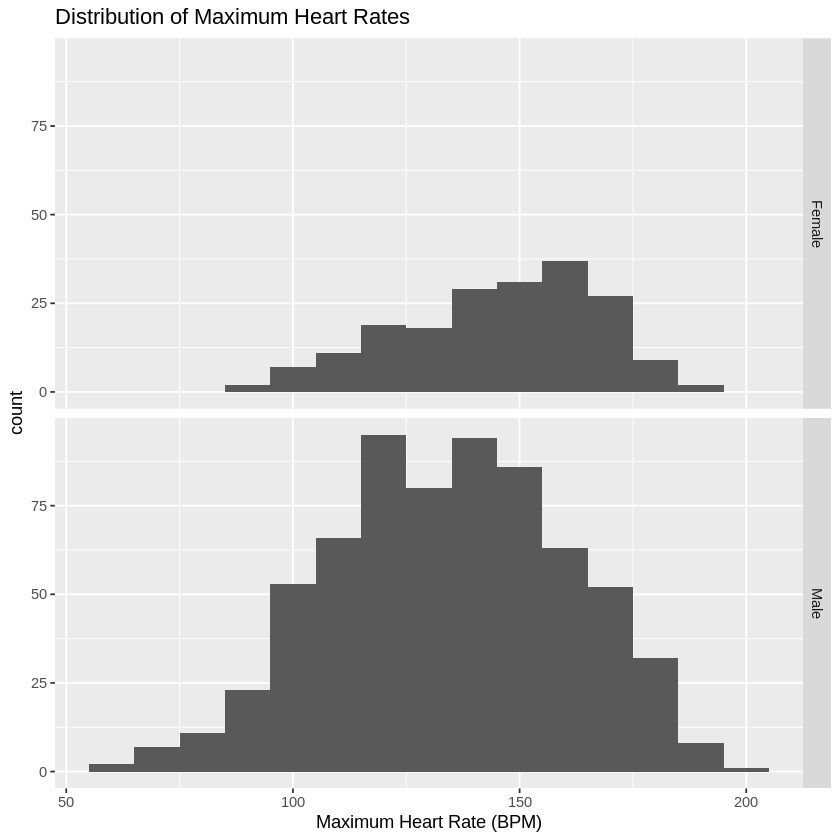

In [35]:
max_heart_rate_hist <- data %>%
                        ggplot() + 
                        geom_histogram(aes(x = max_heart_rate), binwidth = 10) +
                        ggtitle("Distribution of Maximum Heart Rates") +
                        facet_grid(sex ~ .) +
                        xlab("Maximum Heart Rate (BPM)")
max_heart_rate_hist

We can also estimate our parameter by finding the mean of each sex, and then finding the difference between the two means.

In [36]:
# here we find the sample mean of max heart rate among each sex
means <- data %>%
    group_by(sex) %>%
    summarise(mean = mean(max_heart_rate))

# here we find the sample difference in means between the two sexes
p_estim <- means %>%
    pivot_wider(names_from = "sex", values_from = "mean") %>%
    mutate(Diff = abs(Female - Male))

p_estim

Female,Male,Diff
<dbl>,<dbl>,<dbl>
146.2448,135.0639,11.1809


So we've estimated our parameter, the difference in means of max heart rate accross the sexes, as about 11.18 bpm. We can visualize this in a density graph with the mean of each sex highlighted.

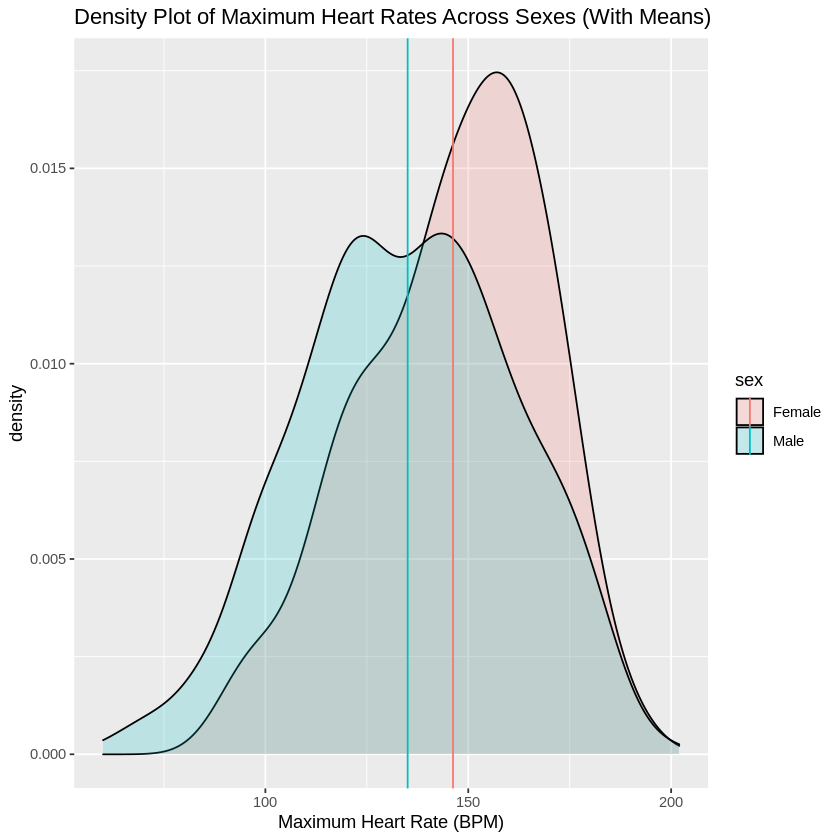

In [37]:
max_heart_rate_density_plot <- data %>%
    ggplot(aes(x = max_heart_rate, fill = sex)) + 
    geom_density(alpha = 0.2) +
    labs(x = "Maximum Heart Rate (BPM)",
         title = "Density Plot of Maximum Heart Rates Across Sexes (With Means)") +
    geom_vline(data = means, aes(xintercept = mean, color = sex), size = 0.5)

max_heart_rate_density_plot

### Methods: Planning

The good thing about this report is that it contains a substantial number of observations for each category we are going to compare, which will allow for a good sample to be drawn independently. As the dataset contains observations from 4 geographical locations, we expect the results to be generalizable to the population.

Our planned methods include conducting a hypothesis test to investigate if difference in maximum heart rate achieved exists between genders, with our null hypothesis being that there is no difference, and alternate hypothesis being that there is. In addition we will be computing the corresponding confidence intervals at 90, 95 and 99 percent confidence levels to understand if multiple samples are taken, where majority of the observations will lie in the range of plausible values.

Because we don't have access to the whole population, we must bootstrap from our sample. Our parameter estimate is only an estimation, dependent on our sample, and different samples provide different values for the parameter estimate. Therefore, we cannot just compare our sample parameter estimate (11.18bpm) with the null hypothesis (0bpm) and draw conclusions from that.

##### What do you expect to find?
We expect to find a notable difference in the maximum heart rate achieved between the genders (male ≠ female). According to Prabhavathi et al. (2014), the difference is likely due to the size of the heart, since the female heart is typically smaller, pumping less blood with each beat, thus needing to beat at a faster rate to match the larger male heart’s output. 

##### What impact could such findings have?
These findings could hint that one of the sexes typically has better cardiac function and survival than the other in the face of cardiac disease. 

##### What future questions could this lead to?
Potential questions include analyzing if heart rate is more contingent on age in comparison to gender. Specifically, if aging causes the difference in heart rate between genders to disappear.


### References
- Di Fusco, Stefania A., et al. "The Influence of Gender on Heart Rhythm Disease." Pacing and Clinical Electrophysiology, vol. 37, no. 5, 2014, pp. 650-657.

- Prabhavathi, K., Selvi, K. T., Poornima, K. N., & Sarvanan, A. (2014). “Role of biological sex in normal cardiac function and in its disease outcome - a review”. Journal of clinical and diagnostic research : JCDR, vol 8 no 8., BE01–BE4.

- Roth, Gregory A., et al. "Global Burden of Cardiovascular Diseases and Risk Factors, 1990-2019: Update from the GBD 2019 Study." Journal of the American College of Cardiology, vol. 76, no. 25, 2020, pp. 2982-3021.

- Tsao, Connie W., et al. "Heart Disease and Stroke Statistics-2022 Update: A Report from the American Heart Association." Circulation (New York, N.Y.), vol. 145, no. 8, 2022, pp. E153-e639.

- UCI Machine Learning Repository: Heart Disease Data Set, https://archive.ics.uci.edu/ml/datasets/Heart+Disease
